# Экзаменационное задание по курсу «Основы машинного обучения»

Вам предстоит применить методы машинного обучения для решения задачи классификации изображений. В ходе выполнения работы вы пройдете через все ключевые этапы построения модели: загрузку и исследование данных, предварительную обработку, выбор алгоритма, тюнинг гиперпараметров и оценку качества предсказаний.

Задание структурировано таким образом, чтобы максимально приблизить вас к реальной работе с данными: вам нужно написать код и ответить на вопросы, чтобы обосновать выбор методов, интерпретировать полученные результаты и принять решение на основе анализа данных.

Вы начнете с исследования предоставленного набора изображений, выявления выбросов и визуализации данных. Затем попробуете несколько классических алгоритмов машинного обучения, таких как логистическая регрессия, случайный лес и метод опорных векторов, сравните их по выбранным метрикам и выберете наиболее подходящий. Далее вы проведете тюнинг гиперпараметров, а также оцените влияние снижения размерности данных на производительность модели.

В финальной части задания вы обучите и протестируете оптимальную модель, визуализируете результаты ее работы и сформулируете выводы.

На выполнение работы отводится три дня.

Успехов!

## Часть 1. Работа с данными (2 балла)

Вам предстоит загрузить и исследовать предоставленный набор данных. Вы проведете базовый анализ (EDA), визуализируете изображения, разобьете данные на обучающую и тестовую выборки. Этот этап важен для понимания структуры данных и подготовки для обучения моделей машинного обучения.

На протяжении всего задания мы будем работать с набором данных `digits` (набор изображений рукописных цифр, где каждый пример — это изображение размером 8x8 пикселей).

#### 1.1 Загрузка и визуализация данных (1 балл)

Загрузите датасет `digits` с помощью функции `datasets` библиотеки `sklearn`. Выведите пять случайных изображений из набора данных в один ряд с помощью библиотеки `matplotlib`.

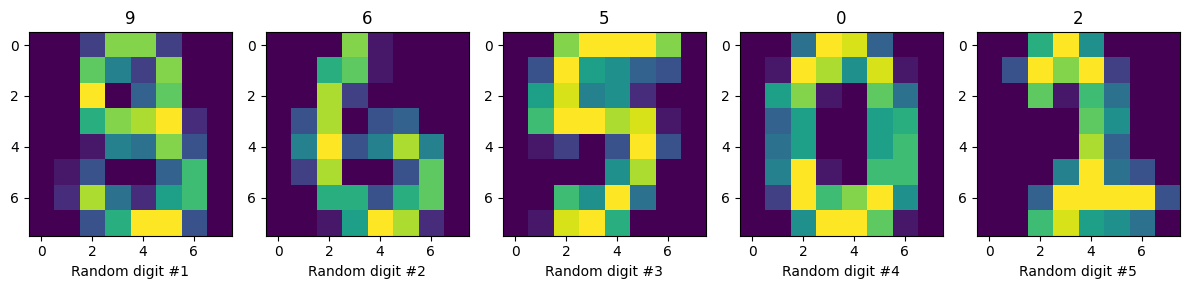

In [1]:
# ВАШЕ РЕШЕНИЕ
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
size = digits.data.shape[0]

plt.figure(figsize=(12, 8))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    rand_index = np.random.randint(size)
    plt.imshow(digits.images[rand_index])
    plt.title(digits.target[rand_index])
    plt.xlabel(f'Random digit #{i + 1}')
plt.tight_layout()
plt.show()

#### 1.2 Базовый анализ и предобработка данных (1 балл)

Выполните базовый анализ данных. С помощью команды `print` выведите на экран следующую информацию:
- число экземпляров `num_samples`;
- число признаков `num_features`;
- число классов `num_classes`;
- распределение по классам — список `class_counts`, содержащий число изображений для каждого класса. Для этого вы можете воспользоваться функцией `np.bincount()`.

In [2]:
# ВАШЕ РЕШЕНИЕ
num_samples = digits.data.shape[0]
num_features = digits.data.shape[1]
num_classes = len(digits.target_names)
class_counts = np.bincount(digits.target)

print(f'Число экземлпяров: {num_samples}')
print(f'Число признаков: {num_features}')
print(f'Число классов: {num_classes}')
print(f'Распределение по классам (0-9): {class_counts}')

Число экземлпяров: 1797
Число признаков: 64
Число классов: 10
Распределение по классам (0-9): [178 182 177 183 181 182 181 179 174 180]


Разделите данные на обучающую и тестовую выборки в пропорции 80:20 (задайте random_state=42).  Нормализуйте признаки с помощью `StandardScaler`. Для обучения `StandardScaler` воспользуйтесь только обучающей выборкой и затем примените обученную модель к тестовой выборке. Назовите нормализованные данные `X_train_scaled` и `X_test_scaled`.

In [3]:
# ВАШЕ РЕШЕНИЕ
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

random_state = 42

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8, random_state=random_state)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Вопрос 1

Почему нормализация данных должна проводиться после разделения на обучающую и тестовую выборки?

> Для того, чтобы модель не "подсматривала" в данные тестовой выборки и в дальнейшем можно было правильно оценить производительность модели.



## Часть 2. Выбор метода обучения (2 балла)

На этом этапе вы должны попробовать различные методы машинного обучения для решения задачи классификации изображений. Основная цель — сравнить несколько моделей, выбрать наиболее подходящую и обосновать свой выбор. Для этого необходимо выбрать подходящую метрику оценки.

#### 2.1 Тестирование моделей (2 балла)

Обучите три модели линейной классификации с помощью библиотеки `sklearn` на данных `X_train_scaled`: **логистическую регрессию**, **метод опорных векторов** и **случайный лес**.

Выберите метрику оценки качества модели, оцените ее на тестовой выборке `X_test_scaled` и сохраните в переменную `score_logreg`, `score_svm` и `score_rf` в соответствии с методом обучения.

Сравните производительности моделей и выберите лучшую из трех.


In [4]:
# ВАШЕ РЕШЕНИЕ
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg_y = logreg.predict(X_test_scaled)

svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_y = svm.predict(X_test_scaled)

forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)
forest_y = forest.predict(X_test_scaled)

score_logreg = accuracy_score(y_test, logreg_y)
score_svm = accuracy_score(y_test, svm_y)
score_rf = accuracy_score(y_test, forest_y)

In [5]:
print(f"Логистическая регрессия:")
print(f"Score={score_logreg:.4f}")

print(f"Метод опорных векторов:")
print(f"Score={score_svm:.4f}")

print(f"Случайный лес:")
print(f"Score={score_rf:.4f}")

Логистическая регрессия:
Score=0.9722
Метод опорных векторов:
Score=0.9806
Случайный лес:
Score=0.9750


#### Вопрос 2
*  Какой метод показывает наилучшие результаты?

*  Какую метрику оценки вы выбрали для данного набора данных и почему?

> Метод опорных векторов покзвавает наилучшие результаты: accuracy=0.9806 (против 0.9722 и 0.9750).  
Была выбрана метрика _accuracy_ - она является достаточно информативной в нашем случае, т.к. классы хорошо сбалансированы (примерно одинаковое количество значений для каждого из классов).



## Часть 3. Регуляризация (1 балл)

#### 3.1 Регуляризация (1 балл)
Добавьте регуляризацию (параметр `C` в `LogisticRegression`). Протестируйте качество обучения модели при разных значениях параметра регуляризации `С`: `[0.01, 0.03, 0.1, 0.3, 1, 3]`. Сравните метрики полученных моделей. Для каждого значения `C` выведите на экран значения метрики.

> Пример:
> `LogisticRegression(C=0.01, max_iter=1000, random_state=42)`

При C=0.01  accuracy - [0.9417]
При C=0.03  accuracy - [0.9583]
При C=0.1   accuracy - [0.9694]
При C=0.3   accuracy - [0.9750]
При C=1     accuracy - [0.9722]
При C=3     accuracy - [0.9694]


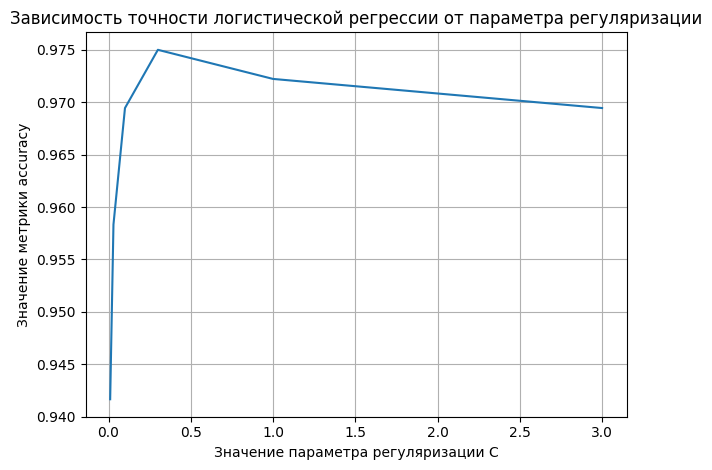

In [6]:
# ВАШЕ РЕШЕНИЕ
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def test_diff_reg_param(
    C, 
    max_iter=1000, 
    random_state=42
    ):
    results = {}

    for param in C:
        # Обучим модель с каждый C и получим accuracy такой модели
        model = LogisticRegression(C=param, max_iter=max_iter, random_state=random_state)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        score = accuracy_score(y_test, y_pred)

        # Занесём параметр и accuracy в словарь
        results[param] = score

    # Выведем значения параметра и accuracy модели при этих значениях
    for key, value in results.items():
        print(f'При C={key:<5} accuracy - [{value:.4f}]')

    # Визуализируем зависимость accuracy от параметра регуляризации
    plt.plot(results.keys(), results.values())
    plt.grid()
    plt.xlabel('Значение параметра регуляризации C')
    plt.ylabel('Значение метрики accuracy')
    plt.title('Зависимость точности логистической регрессии от параметра регуляризации')
    plt.tight_layout()

    return results

C = [0.01, 0.03, 0.1, 0.3, 1, 3]

temp = test_diff_reg_param(C)

#### Вопрос 3
Как регуляризация влияет на качество модели и ее способность к обобщению, учитывая результаты тестирования на конкретных данных? Какое значение параметра `С` вы считаете оптимальным?

> Регуляризация вводит штраф к функции потерь, тем самым позволяя модели выявлять более сложные или более простые закономерности. На протестированных данных видно, что при слишком низком значении параметра, модель слишком упрощается и недообучается. При слишком высоком наоборот - слишком усложняется. В обоих случаях модель не видит наиболее оптимальных закономерностей и теряет в точности. 
>
> Наиболее оптимальным значением среди протестированных является `C=0.3`, при котором _accuracy=9750_.


## Часть 4. Оптимизация гиперпараметров (1 балл)

В этой части задания от вас требуется оптимизировать гиперпараметры выбранной модели, чтобы добиться наилучших результатов. Гиперпараметры управляют процессом обучения и могут существенно влиять на точность и обобщающую способность модели. Для их настройки примените метод поиска по сетке (GridSearchCV) или случайного поиска (RandomizedSearchCV), а затем обучите модель с оптимальными параметрами. В конце оцените влияние тюнинга на качество предсказаний и сделайте выводы о его важности.


#### 4.1 Подбор гиперпараметров (1 балл)

Воспользуйтесь методом HyperOpt для поиска оптимальных гиперпараметров. Например, в случае SVM, оптимизируйте `kernel` (`['linear', 'rbf', 'poly']`), `gamma` и `C`.

Обратите внимание, что в случае использования `hp.choice`, оптимизатор вернет не значение параметра, а его индекс в списке. Например, если оптимальным ядром для обучения окажется `rbf`, то HyperOpt вернет индекс `1`.

In [18]:
# ВАШЕ РЕШЕНИЕ
from hyperopt import fmin, tpe, Trials, hp
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from pprint import pprint

# Для кросс-валидации внутри перебора напишем соответствующую функцию
def svc_cv(params):
    '''
    Input:
    `params` - словарь гипермараметров для модели  
    ___
    Output:
    `{'loss': -np.mean(scores), 'status': 'ok'}` - словарь c средним отрицательным значением точности по кросс-валидации
    '''
    model = SVC(
        C=params['C'],
        gamma=params['gamma'],
        kernel=params['kernel'],
        random_state=42
    )

    # Кросс-валидация
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    return {'loss': -np.mean(scores), 'status': 'ok'}


# Тут храним результаты переборов
trials = Trials()

# Зададим пространство для перебора гиперпараметров
space_svc = {
    'C' : hp.loguniform('C', -3, 4),    # Перебираем параметры в логарифмическом масштабе для равномерного перебора по разрядам
    'gamma' : hp.loguniform('gamma', -4, 2),    # Аналогично
    'kernel' : hp.choice('kernel', ['linear', 'rbf', 'poly'])
}

# Перебираем гиперпараметры
best_params = fmin(
    fn=svc_cv,
    space=space_svc,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(42)
)

print('\nЛучшие гиперпараметры:')
pprint(best_params)

# Сохраняем лучшие гиперпарамерты
# и преобразовываем из логарифмической записи
best_C = best_params['C']
best_gamma = best_params['gamma']
best_kernel_idx = best_params['kernel']

best_kernel = ['linear', 'rbf', 'poly'][best_kernel_idx]

# Применяем лучшие гиперпараметры в модель
print('\nОбучение модели на лучших гиперпараметрах...')
best_svc_model = SVC(
    C=best_C,
    gamma=best_gamma,
    kernel=best_kernel,
    random_state=42
)

# Оценим точность полученной модели
best_svc_model.fit(X_train_scaled, y_train)
y_pred_best = best_svc_model.predict(X_test_scaled)
best_svc_accuracy = accuracy_score(y_test, y_pred_best)

print(f'\nТочность лучшей SVC модели: [{best_svc_accuracy:.4f}]')

100%|██████████| 50/50 [00:12<00:00,  4.02trial/s, best loss: -0.9825953348819203]

Лучшие гиперпараметры:
{'C': np.float64(20.62519472511848),
 'gamma': np.float64(0.7043322930767392),
 'kernel': np.int64(2)}

Обучение модели на лучших гиперпараметрах...

Точность лучшей SVC модели: [0.9861]


#### Вопрос 4

* Какая комбинация гиперпараметров показывает наилучшие результаты?

* Насколько выбранная комбинация соответствовала вашим ожиданиям и почему?

> Лучшей комбинацией гиперпараметров оказалась следующая: `C = 20.62519472511848`, `gamma = 0.7043322930767392`, `kernel = 'rbf'`.  
Такая комбинация улучшила результат не так сильно, как ожидалось, однако в конексте текущей точности прирость ощутим (с 0.9806 до 0.9861).

## Часть 5. Снижение размерности данных (2 балла)

В этой части задания от вас требуется применить метод главных компонент (PCA) для снижения размерности данных.

PCA позволяет уменьшить количество признаков, сохраняя как можно больше информации, что может ускорить обучение моделей и снизить риск переобучения. Вам нужно визуализировать данные в пространстве главных компонент, сравнить качество предсказаний моделей, обученных на разном количестве компонент, и выбрать оптимальное число компонент.

#### 5.1 PCA и визуализация (1 балл)

Примените метод главных компонент (PCA) из библиотеки `sklearn` и визуализируйте данные в пространстве двух главных компонент. Каждая точка на графике должна быть раскрашена в соответствии с ее истинным классом, чтобы можно было оценить, насколько хорошо классы разделяются в новом пространстве.

Количество главных компонент: 2
Размерность X_train изменена до (1437, 2)
Размерность X_test изменена до (360, 2)


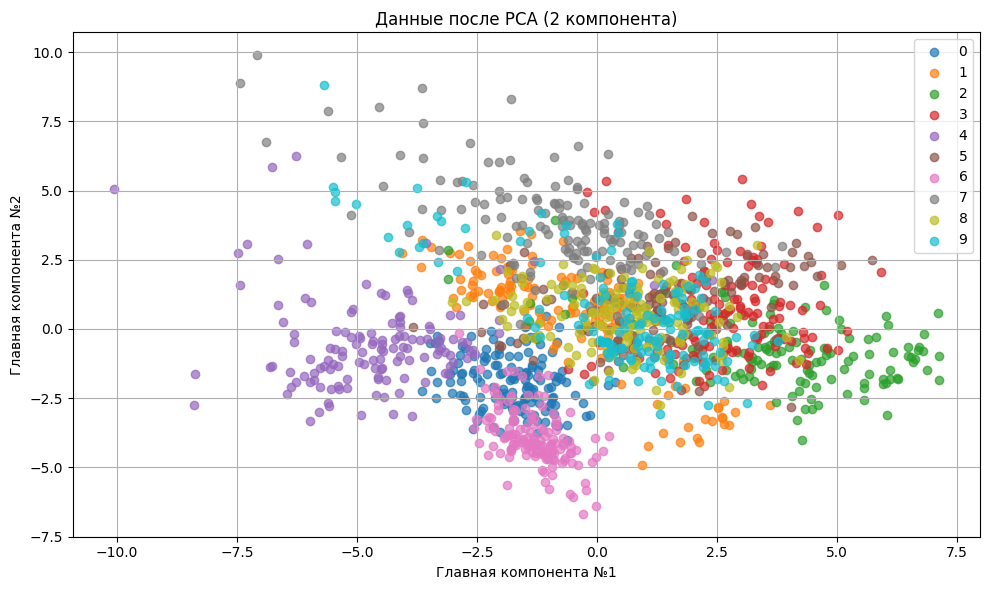

In [30]:
# ВАШЕ РЕШЕНИЕ
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

pca.fit(X_train_scaled)

print(f'Количество главных компонент: {pca.n_components_}')

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f'Размерность X_train изменена до {X_train_pca.shape}')
print(f'Размерность X_test изменена до {X_test_pca.shape}')

# Визуализация
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=str(i), alpha=0.7)
plt.xlabel('Главная компонента №1')
plt.ylabel('Главная компонента №2')
plt.title('Данные после PCA (2 компонента)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#### Вопрос 5

* Насколько четко классы разделяются в пространстве двух главных компонент PCA?

* Можно ли ожидать высокой точности модели, обученной на данных, сведенных к двум измерениям?

> Некоторые классы разделены очень чётко (4, 6), однако остальные классы сильно смешаны и для обучения моделей (особенно линейный) не подойут. При обучении на таких данных модели классификации будут часто ошибаться и точность будет невысокой. В такой ситуации может иметь место подход с плотностным анализом и классификацией (например, DBSCAN), однако, судя по расположению классов на графике, такой подход тоже не увенчается успехом.

#### 5.2 Обучение на разном числе компонент (1 балл)

Нужно провести эксперимент, в котором необходимо варьировать число главных компонент (от одного до полного количества признаков с произвольным шагом) и оценивать качество предсказаний и время обучения модели, которую вы оптимизировали на прошлом этапе.

Постройте два графика в одних координатных осях:
- Ось X — число главных компонент.
- Одна ось Y — время обучения.
- Вторая ось Y — качество предсказаний (например, Accuracy на тестовой выборке).

На основе полученных результатов определите оптимальное число компонент PCA для данной задачи.

Обратите внимание, что как и в случае с нормализацией, обучать PCA нужно только на обучающей выборке, а затем применять обученную модель к тестовым данным.


Начинаем эксперимент с PCA и SVM...
Тестируем n_components = 1/64...
Тестируем n_components = 2/64...
Тестируем n_components = 3/64...
Тестируем n_components = 4/64...
Тестируем n_components = 5/64...
Тестируем n_components = 6/64...
Тестируем n_components = 7/64...
Тестируем n_components = 8/64...
Тестируем n_components = 9/64...
Тестируем n_components = 10/64...
Тестируем n_components = 11/64...
Тестируем n_components = 12/64...
Тестируем n_components = 13/64...
Тестируем n_components = 14/64...
Тестируем n_components = 15/64...
Тестируем n_components = 16/64...
Тестируем n_components = 17/64...
Тестируем n_components = 18/64...
Тестируем n_components = 19/64...
Тестируем n_components = 20/64...
Тестируем n_components = 21/64...
Тестируем n_components = 22/64...
Тестируем n_components = 23/64...
Тестируем n_components = 24/64...
Тестируем n_components = 25/64...
Тестируем n_components = 26/64...
Тестируем n_components = 27/64...
Тестируем n_components = 28/64...
Тестируем n_component

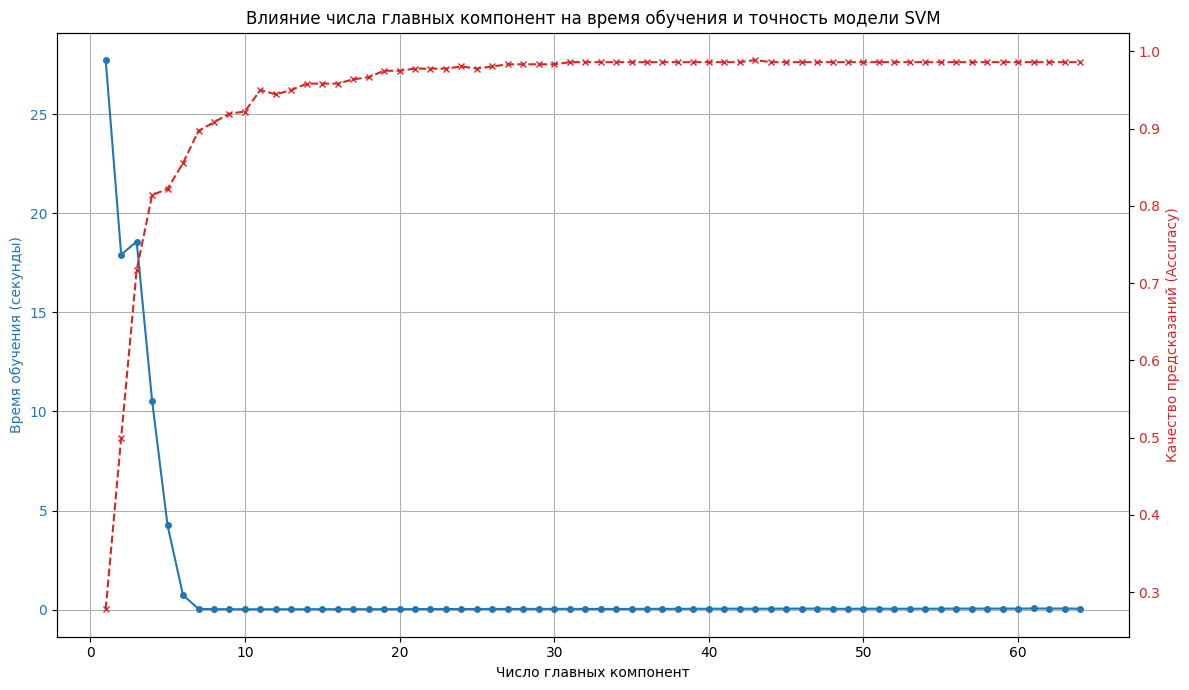


Анализ результатов:
Максимальная точность 0.9889 достигается при 43 компонентах PCA.
Время обучения при этом количестве компонент: 0.0443 секунд.
Компромиссное оптимальное число компонент: 31
Точность при компромиссном числе компонент: 0.9861
Время обучения при компромиссном числе компонент: 0.0401 секунд.


In [32]:
# ВАШЕ РЕШЕНИЕ
import time

# Списки для хранения результатов
n_components_list = []
training_times = []
accuracy_scores = []

# Полное количество признаков в исходных данных
full_n_features = X_train_scaled.shape[1]

components_to_test = range(1, full_n_features + 1, 1) # От 1 до 64 с шагом 1

print(f"Начинаем эксперимент с PCA и SVM...")
for n_comp in components_to_test:
    print(f"Тестируем n_components = {n_comp}/{full_n_features}...")

    pca = PCA(n_components=n_comp, random_state=42)
    pca.fit(X_train_scaled)

    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Модель - ранее заданная с лучшими гиперпараметрами
    model = best_svc_model

    start_time = time.time()
    model.fit(X_train_pca, y_train)
    end_time = time.time()
    training_duration = end_time - start_time

    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    n_components_list.append(n_comp)
    training_times.append(training_duration)
    accuracy_scores.append(accuracy)

print("\nЭксперимент завершен.")

# Визуализация
fig, ax1 = plt.subplots(figsize=(12, 7))

# Первая ось Y - время обучения
ax1.set_xlabel('Число главных компонент')
ax1.set_ylabel('Время обучения (секунды)', color='tab:blue')
ax1.plot(n_components_list, training_times, color='tab:blue', marker='o', linestyle='-', markersize=4)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Создаем вторую ось Y для точности
ax2 = ax1.twinx()
ax2.set_ylabel('Качество предсказаний (Accuracy)', color='tab:red')
ax2.plot(n_components_list, accuracy_scores, color='tab:red', marker='x', linestyle='--', markersize=4)
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Влияние числа главных компонент на время обучения и точность модели SVM')
plt.tight_layout()
plt.show()

# Найдем индекс максимальной точности
best_accuracy_idx = np.argmax(accuracy_scores)
optimal_n_components = n_components_list[best_accuracy_idx]
max_accuracy = accuracy_scores[best_accuracy_idx]
time_at_optimal_n_components = training_times[best_accuracy_idx]

print(f"\nАнализ результатов:")
print(f"Максимальная точность {max_accuracy:.4f} достигается при {optimal_n_components} компонентах PCA.")
print(f"Время обучения при этом количестве компонент: {time_at_optimal_n_components:.4f} секунд.")

# Т.к. точность выходит "на плато" найдем, когда точность 
# в пределах 99% от максимальной, и при этом число компонент минимально.
threshold_accuracy = max_accuracy * 0.995 # Например, 99.5% от лучшей точности
candidate_n_components = []
for i, acc in enumerate(accuracy_scores):
    if acc >= threshold_accuracy:
        candidate_n_components.append(n_components_list[i])

if candidate_n_components:
    # Ищем среди кандидатов ту, что обучается быстрее
    optimal_n_for_tradeoff = min(candidate_n_components)
    idx_for_tradeoff = n_components_list.index(optimal_n_for_tradeoff)
    accuracy_at_tradeoff = accuracy_scores[idx_for_tradeoff]
    time_at_tradeoff = training_times[idx_for_tradeoff]
    print(f"Компромиссное оптимальное число компонент: {optimal_n_for_tradeoff}")
    print(f"Точность при компромиссном числе компонент: {accuracy_at_tradeoff:.4f}")
    print(f"Время обучения при компромиссном числе компонент: {time_at_tradeoff:.4f} секунд.")

#### Вопрос 6

Укажите плюсы и минусы снижения размерности для обучения моделей машинного обучения. Соответствуют ли графики эффективности и длительности обучения вашим ожиданиям? К каким выводам вы пришли, глядя на них?

> __Плюсы:__
> - Очистка от возможного шума и неинформативных признаков
> - Ускорение обучения  
>
> __Минусы:__
> - Потеря информации
> - Возможно снижение точности  
> 
> Графики соответсвуют моим ожиданиям. Время обучения падает при переходе от малого количества компонент к большему, а затем стабилизируется, так как основная вычислительная нагрузка связана не с количеством компонент, а с размером датасета и сложностью модели.


## Часть 6. Оценка и визуализация предсказаний (2 балла)

Вам необходимо окончательно обучить и оценить модель, используя наилучшие найденные параметры. Постройте матрицу ошибок, чтобы визуально проанализировать, какие классы путает модель (можете воспользоваться готовой функцией `confusion_matrix` от `sklearn`).

#### 6.1 Оценка модели на тестовых данных (1 балл)

Обучите и протестируйте модель на тестовой выборке, оценив ее качество по выбранным метрикам.



In [36]:
# ВАШЕ РЕШЕНИЕ
print(f"Используем оптимальное количество компонент PCA: {optimal_n_components}")
print(f"Используем лучшие гиперпараметры для модели SVC:")
pprint(best_params)

print("\nОбучение PCA и трансформация данных...")
pca_final = PCA(n_components=optimal_n_components, random_state=42)
pca_final.fit(X_train_scaled)

X_train_pca = pca_final.transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

print(f"Размерность обучающей выборки после PCA: {X_train_pca.shape}")
print(f"Размерность тестовой выборки после PCA: {X_test_pca.shape}")

print("\nОбучение финальной модели SVC...")
final_model = SVC(
    C=best_C,
    gamma=best_gamma,
    kernel=best_kernel,
    random_state=42
)
final_model.fit(X_train_pca, y_train)

print("Предсказание на тестовой выборке...")
y_pred = final_model.predict(X_test_pca)

print("\nОценка качества модели:")

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность (Accuracy) на тестовой выборке: {accuracy:.4f}")

Используем оптимальное количество компонент PCA: 43
Используем лучшие гиперпараметры для модели SVC:
{'C': np.float64(20.62519472511848),
 'gamma': np.float64(0.7043322930767392),
 'kernel': np.int64(2)}

Обучение PCA и трансформация данных...
Размерность обучающей выборки после PCA: (1437, 43)
Размерность тестовой выборки после PCA: (360, 43)

Обучение финальной модели SVC...
Предсказание на тестовой выборке...

Оценка качества модели:
Точность (Accuracy) на тестовой выборке: 0.9889


#### Вопрос 7

Как вы оцениваете качество предсказаний модели? На ваш взгляд, достаточной ли производительности вы добились? Как можно было бы улучшить модель?

> На мой взгляд, для большинства практических целей, связанных с классификацией рукописных цифр, производительность в 98.89% абсолютно достаточна. Больше точности нужно в исключительных отраслях, например, в медицине.  
Для таких целей можно улучшить текущую модель: дофайнтюнить гиперпараметры, написать более сложную нейронную сеть или использовать ансамблевые методы (по типу бэггинга и бустинга).

#### 6.2 Визуализация модели (1 балл)

Постройте матрицу ошибок, чтобы визуально проанализировать, какие классы путает модель (можете воспользоваться готовой функцией `confusion_matrix` от `sklearn`).

Построение матрицы ошибок...


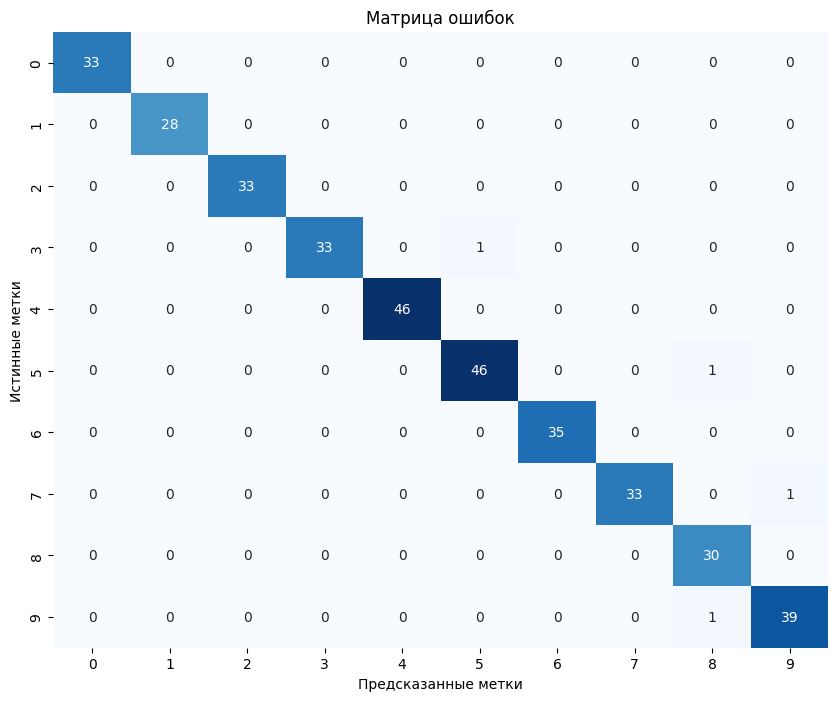


Анализ матрицы ошибок:
  Класс 3 был ошибочно предсказан как 5 1 раз(а).
  Класс 5 был ошибочно предсказан как 8 1 раз(а).
  Класс 7 был ошибочно предсказан как 9 1 раз(а).
  Класс 9 был ошибочно предсказан как 8 1 раз(а).

Наибольшее количество ошибок по классам:
  Класс 3: 1 ошибок
  Класс 5: 1 ошибок
  Класс 7: 1 ошибок
  Класс 9: 1 ошибок


In [ ]:
# ВАШЕ РЕШЕНИЕ
from sklearn.metrics import confusion_matrix
import seaborn as sns
print("Построение матрицы ошибок...")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()

print("\nАнализ матрицы ошибок:")

# Можно найти, какие классы путаются чаще всего
# Например, просмотреть элементы, где истинная метка X, а предсказанная Y (вне диагонали)
for i in range(len(digits.target_names)):
    for j in range(len(digits.target_names)):
        if i != j and cm[i, j] > 0: # Если есть ошибки
            print(f"  Класс {digits.target_names[i]} был ошибочно предсказан как {digits.target_names[j]} {cm[i, j]} раз(а).")

# Где модель ошибается больше всего
incorrect_predictions_per_class = np.sum(cm, axis=1) - np.diag(cm)
print("\nНаибольшее количество ошибок по классам:")
for i, errors in enumerate(incorrect_predictions_per_class):
    if errors > 0:
        print(f"  Класс {digits.target_names[i]}: {int(errors)} ошибок")


#### Вопрос 8

Какие критерии оценки могут быть использованы для более глубокого понимания производительности модели?

> Можно (и желательно) использовать не одну, а несколько метрик, чтобы оценивать производительность модели по разным параметрам (например, precision, recall и т.д.), либо же использовать их некоторую комбинацию по типу ROC-AUC.

# Заключение
Поздравляем, вы успешно прошли все этапы экзаменационного задания!

В ходе работы вы загрузили и исследовали данные, применили различные методы машинного обучения, подобрали оптимальную модель и настроили ее гиперпараметры. Вы также изучили влияние снижения размерности на качество классификации и научились визуализировать результаты работы модели.

Этот процесс напоминает реальную работу специалиста по машинному обучению: от анализа данных до выбора оптимального подхода и его финальной оценки. Надеемся, что это задание помогло вам глубже понять алгоритмы классификации и методы их улучшения.

## Обратная связь
Нам важно узнать ваше мнение:

- Какие задания показались вам наиболее полезными?
- Было ли что-то сложное или непонятное?
- Какие темы вы хотели бы изучить подробнее?



> Все задания показались интересными и полезными, но для себя особенно полезными считаю задания на подбор гиперпараметров, т.к. оно принудило использовать и местами даже разбираться в HyperOpt. Считаю это особенно полезным на фоне остальных заданий, потому что от гиперпараметров крайне сильно зависит процесс обучения моделей (на практике, так вообще супер критично).  
>
> Больше всего времени потратил опять же на HyperOpt, но не жалею, что разобрался. По формулировкам и последовательности заданий почти всё замечательно. Кроме части 4, где в преамбуле требуется использовать GridSearchCV или RandomizedSearchCV, а в первом же задании императивно требуется использовать HyperOpt. Коллизию устранить бы и будет вообще супер!
